In [1]:
# Project Title
# "Comprehensive Analysis of Amazon Product Sales: Insights and Trends Across Categories"


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading and converting dataset to pandas DataFrame

# Dataset1 which contains all details regarding sales 
dataset = pd.read_csv("amazon_products.csv")
df = pd.DataFrame(dataset)

# Dataset2 which contains category name based on category id
dataset2 = pd.read_csv("amazon_categories.csv")
df2 = pd.DataFrame(dataset2)


print(df.head())
print(df2.head())

         asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                             productURL  stars  reviews   price  listPrice  \
0  https://www.amazon.com/dp/B014TMV5YE    4.5        0  139.99       0.00   
1  https://www.amazon.com/dp/B07GDLCQXV    4.5        0  169.99     209.99   
2  https://www.amazo

In [4]:
print(df.shape)
print(df2.shape)

(1426337, 11)
(248, 2)


In [5]:
# Joining column of category name in dataset 1 from dataset 2

# Merging both datasets based on category_id
merged = pd.merge(df, df2, left_on="category_id", right_on="id", how="inner")

# Creating new column named Category_Name based on above merged process
df["Category_Name"] = merged["category_name"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  Category_Name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 121.1+ MB


In [15]:
# Dropping unnecessary columns for better analysis
df.drop(["title", "imgUrl", "productURL"], inplace=True, axis=1)

In [16]:
# Creating a new column to calculate total sales for better analysis
df["Total_Sales"] = df["price"] * df["boughtInLastMonth"]

# Creating a column which shows difference between price and listPrice basically it means profit column
df["Profit"] = (df["price"] - df["listPrice"]) * df["boughtInLastMonth"]


In [17]:
print(df[["price", "listPrice", "boughtInLastMonth", "Total_Sales", "Profit"]].head(10))

    price  listPrice  boughtInLastMonth  Total_Sales    Profit
0  139.99       0.00               2000     279980.0  279980.0
1  169.99     209.99               1000     169990.0  -40000.0
2  365.49     429.99                300     109647.0  -19350.0
3  291.59     354.37                400     116636.0  -25112.0
4  174.99     309.99                400      69996.0  -54000.0
5  144.49       0.00                500      72245.0   72245.0
6  169.99       0.00                400      67996.0   67996.0
7  299.99       0.00                100      29999.0   29999.0
8  112.63     137.04                500      56315.0  -12205.0
9  209.99       0.00                200      41998.0   41998.0


In [18]:
df.columns

Index(['asin', 'stars', 'reviews', 'price', 'listPrice', 'category_id',
       'isBestSeller', 'boughtInLastMonth', 'Category_Name', 'Total_Sales',
       'Profit', 'Price_Segment', 'QtySold_Segment'],
      dtype='object')

In [19]:
# Checking if null value exists
df.isnull().sum()

asin                  0
stars                 0
reviews               0
price                 0
listPrice             0
category_id           0
isBestSeller          0
boughtInLastMonth     0
Category_Name         0
Total_Sales           0
Profit                0
Price_Segment         0
QtySold_Segment      12
dtype: int64

In [25]:
# Checking if there is duplicate value in asin column which should have to unique values
df["asin"].duplicated().sum()

0

In [26]:
df.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


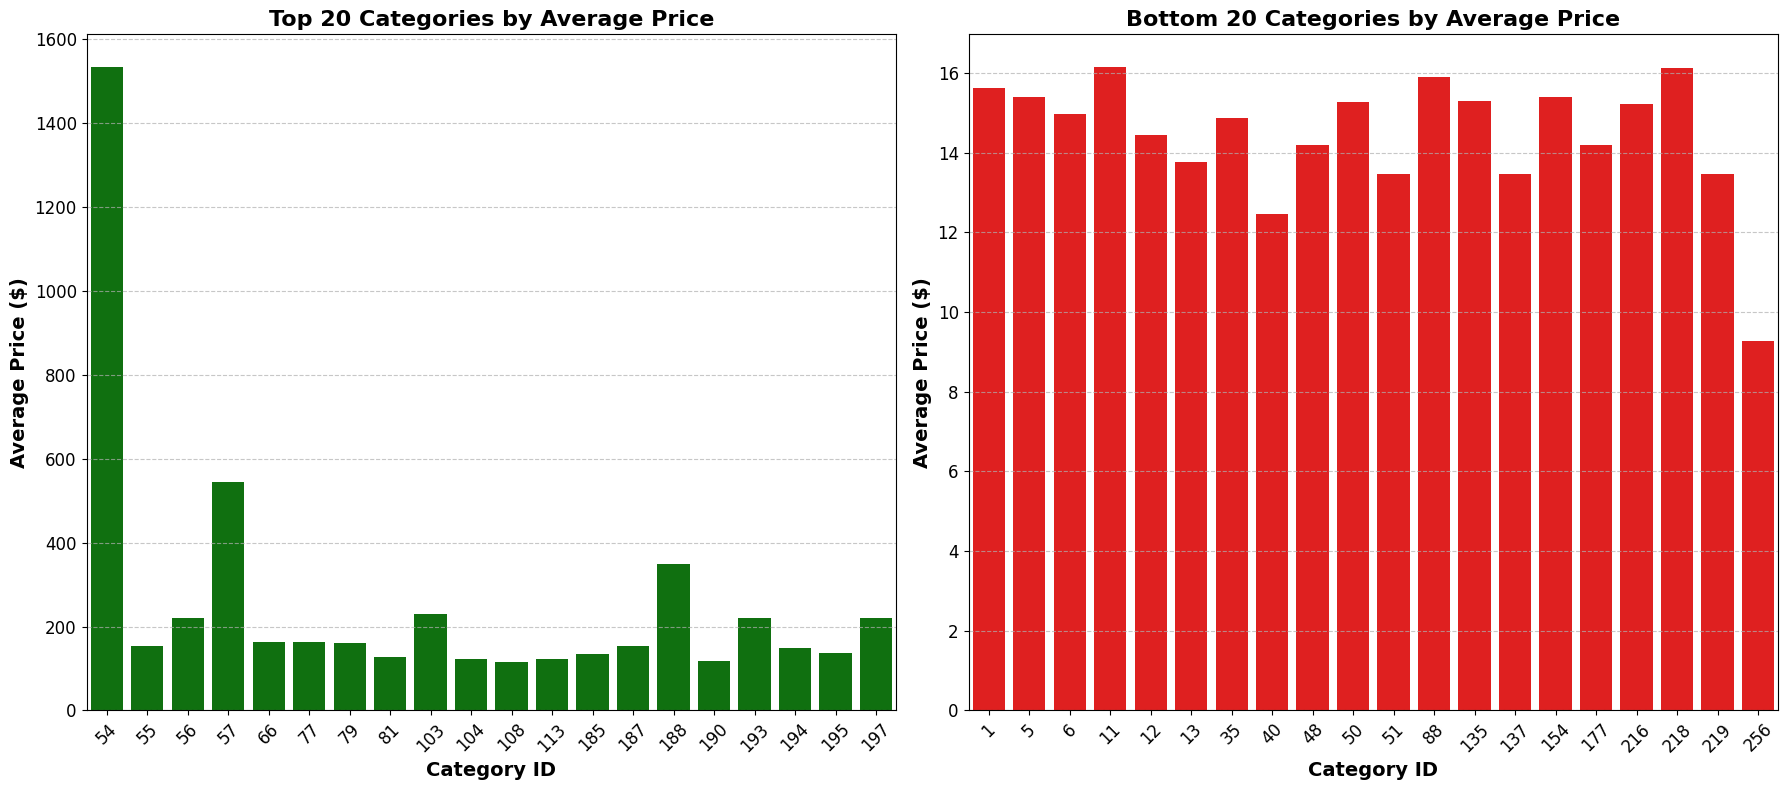

In [99]:
# #### **Easy:**
# 1. **Price Distribution Analysis:**
#    - **Question**: What is the distribution of product prices across different categories?

# Aggregating data based on average prices for each category
avg_prices = df.groupby("category_id")["price"].mean()

# Sorting data
avg_prices_sorted = avg_prices.sort_values(ascending=False)


# Sorting to retrieve only top 20 data
avg_prices_sorted_top = avg_prices_sorted.head(20)

# Sorting to retrieve only bottom 20 data
avg_prices_sorted_bot = avg_prices_sorted.tail(20)

fig, (fig1, fig2) = plt.subplots(1, 2,figsize= (18,8))

# Plotting the top 20 average prices bar graph
sns.barplot(x= avg_prices_sorted_top.index, y= avg_prices_sorted_top.values, ax=fig1, color="green")
fig1.set_title('Top 20 Categories by Average Price', fontsize=16, fontweight='bold')
fig1.set_xlabel('Category ID', fontsize=14, fontweight='bold')
fig1.set_ylabel('Average Price ($)', fontsize=14, fontweight='bold')
fig1.tick_params(axis='x', rotation=45, labelsize= 12)
fig1.tick_params(axis='y', labelsize=12)
fig1.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting the bottom 20 bar graph
sns.barplot(x= avg_prices_sorted_bot.index, y= avg_prices_sorted_bot.values, ax=fig2, color="red")
fig2.set_title('Bottom 20 Categories by Average Price', fontsize=16, fontweight='bold')
fig2.set_xlabel('Category ID', fontsize=14, fontweight='bold')
fig2.set_ylabel('Average Price ($)', fontsize=14, fontweight='bold')
fig2.tick_params(axis='x', rotation=45, labelsize=12)
fig2.tick_params(axis='y', labelsize=12)
fig2.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

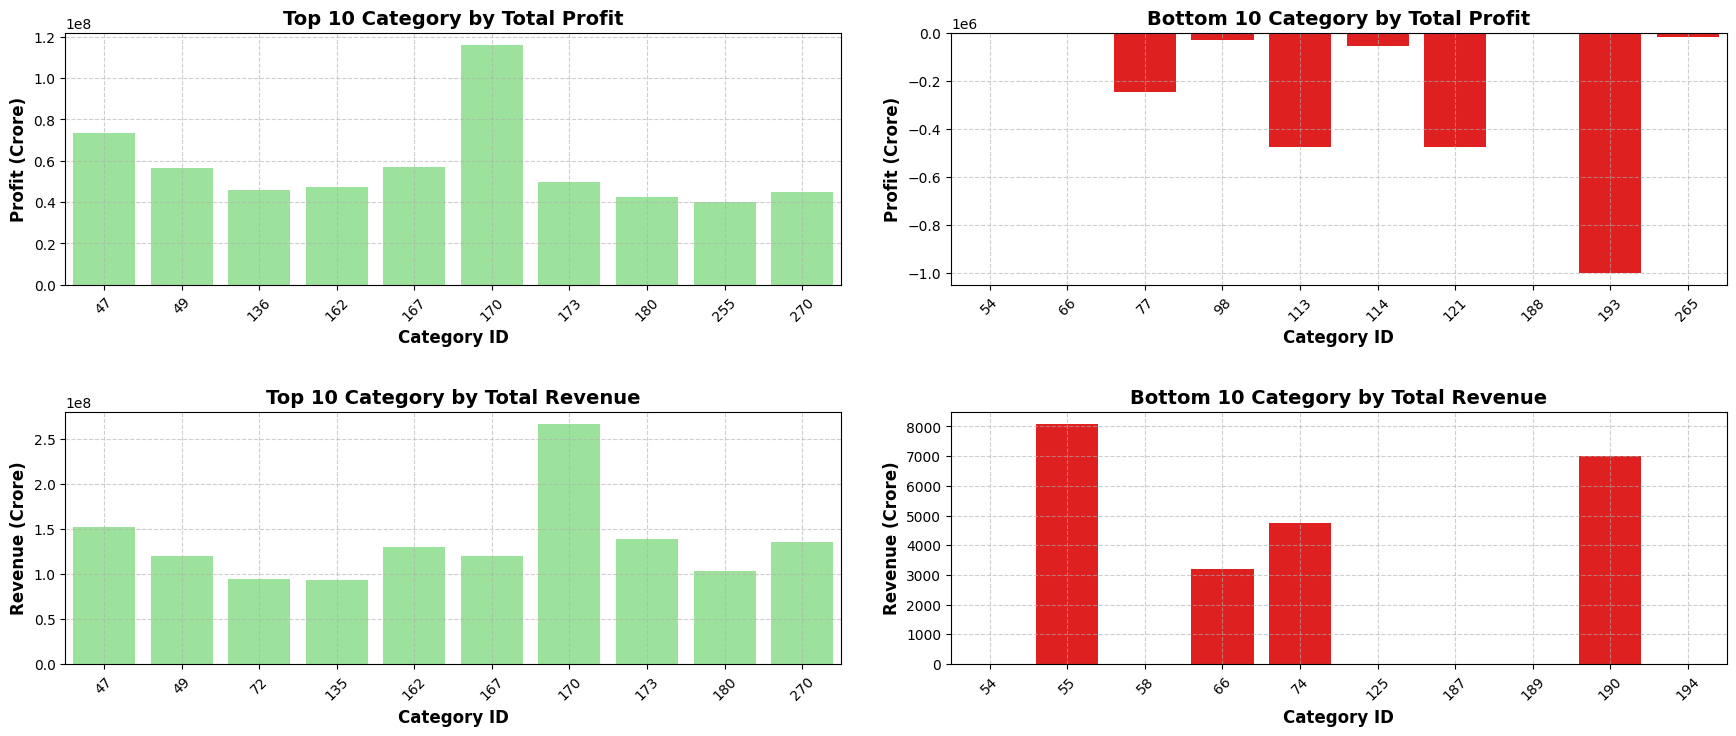

In [54]:
# Top and bottom products by Revenue and profit

# Summarizing data by revenue and category id
category_by_revenue = df.groupby("category_id")["Total_Sales"].sum()

# Sorting summarized revenue data 
category_by_revenue_sorted = category_by_revenue.sort_values(ascending=False)

# Filtering top 10 categories based on total sales
top_10_revenue = category_by_revenue_sorted.head(10)

# Filtering bottom 10 categories based on total sales
bottom_10_revenue = category_by_revenue_sorted.tail(10)

# Summarizing data by profit and category id
category_by_profit = df.groupby("category_id")["Profit"].sum()

# Sorting summarized profit data
category_by_profit_sorted = category_by_profit.sort_values(ascending=False)

# Filtering top 10 categories based on total profit
top_10_profit = category_by_profit_sorted.head(10)

# Filtering bottom 10 categories based on total profit
bottom_10_profit = category_by_profit_sorted.tail(10)

# Plotting Graphs
fig, ((fig1, fig2), (fig3, fig4)) = plt.subplots(2,2, figsize= (18,8))

# 
sns.barplot(x= top_10_profit.index, y= top_10_profit.values, ax=fig1, color= "lightgreen")
fig1.set_xlabel("Category ID", fontsize= 12, fontweight= "bold", color= "black")
fig1.set_ylabel("Profit (Crore)", fontsize= 12, fontweight= "bold", color= "black")
fig1.set_title("Top 10 Category by Total Profit", fontsize= 14, fontweight= "bold", color= "black")
fig1.grid("True", ls= "--", alpha=0.6)
fig1.tick_params(axis='x', rotation=45)

sns.barplot(x= bottom_10_profit.index, y= bottom_10_profit.values, ax= fig2, color="red")
fig2.set_xlabel("Category ID", fontsize= 12, fontweight= "bold", color= "black")
fig2.set_ylabel("Profit (Crore)", fontsize= 12, fontweight= "bold", color= "black")
fig2.set_title("Bottom 10 Category by Total Profit", fontsize= 14, fontweight= "bold", color= "black")
fig2.grid("True", ls= "--", alpha=0.6)
fig2.tick_params(axis='x', rotation=45)

sns.barplot(x= top_10_revenue.index, y= top_10_revenue.values, ax= fig3, color="lightgreen")
fig3.set_xlabel("Category ID", fontsize= 12, fontweight= "bold", color= "black")
fig3.set_ylabel("Revenue (Crore)", fontsize= 12, fontweight= "bold", color= "black")
fig3.set_title("Top 10 Category by Total Revenue", fontsize= 14, fontweight= "bold", color= "black")
fig3.grid("True", ls= "--", alpha=0.6)
fig3.tick_params(axis='x', rotation=45)

sns.barplot(x= bottom_10_revenue.index, y= bottom_10_revenue.values, ax= fig4, color="red")
fig4.set_xlabel("Category ID", fontsize= 12, fontweight= "bold", color= "black")
fig4.set_ylabel("Revenue (Crore)", fontsize= 12, fontweight= "bold", color= "black")
fig4.set_title("Bottom 10 Category by Total Revenue", fontsize= 14, fontweight= "bold", color= "black")
fig4.grid("True", ls= "--", alpha=0.6)
fig4.tick_params(axis='x', rotation=45)


plt.tight_layout(pad=3.0)
plt.show()

In [111]:
# 2. **Top Rated Products:**
#    - **Question**: Which products have the highest average ratings? Create a sorted list of top-rated products.

# Grouping, sorting top 10 products average ratings based on different categories
top_rated_prod = df.groupby("Category_Name")["stars"].mean().sort_values(ascending=True).tail(10)


# Creating a empty list
sorted_list = []

# Appending all values of top_rated_products using loop
for i in top_rated_prod.values:
    sorted_list.append(i)

# Printing
print(sorted_list)

[4.487720295622513, 4.499773926149208, 4.5021806853582556, 4.518130888719124, 4.52290153690255, 4.544674313805817, 4.545314109165808, 4.554725919242048, 4.567541436464088, 4.8323741007194245]


In [69]:
# 3. **Basic Summary Statistics:**
#    - **Question**: What are the basic summary statistics (mean, median, standard deviation) for price and number of items bought (`boughtInLastMonth`)?

summary_stats = df[["price", "boughtInLastMonth"]].agg(["mean", "median", "std"])
print(summary_stats)


             price  boughtInLastMonth
mean     44.769362         153.224281
median   19.990000           0.000000
std     140.528390         836.953494


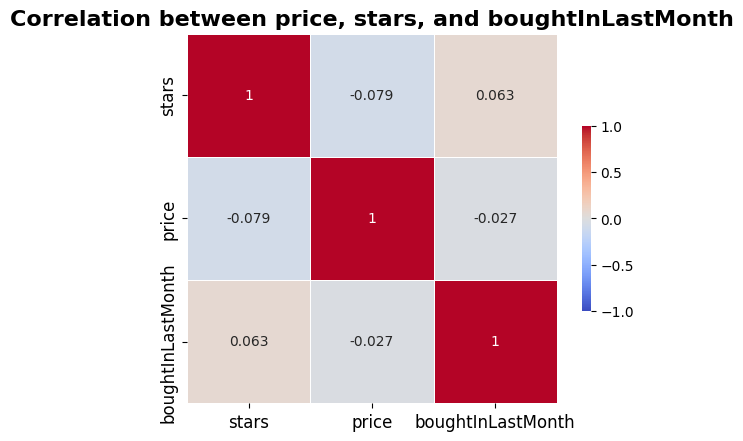

In [112]:
# #### **Medium:**
# 1. **Correlation Analysis:**
#    - **Question**: What is the correlation between `price`, `stars`, and `boughtInLastMonth`? Use a correlation matrix and heatmap.
#    - **Time Limit**: 3 hours.

attributes = df[["stars", "price", "boughtInLastMonth"]]

# Plotting heatmap
sns.heatmap(attributes.corr(), annot=True, cmap="coolwarm", vmin= -1, vmax= 1, center= 0, square=True, linewidths= 0.5, cbar_kws={"shrink": .5})
plt.title("Correlation between price, stars, and boughtInLastMonth", fontsize = 16, fontweight= "bold", color = "black")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()



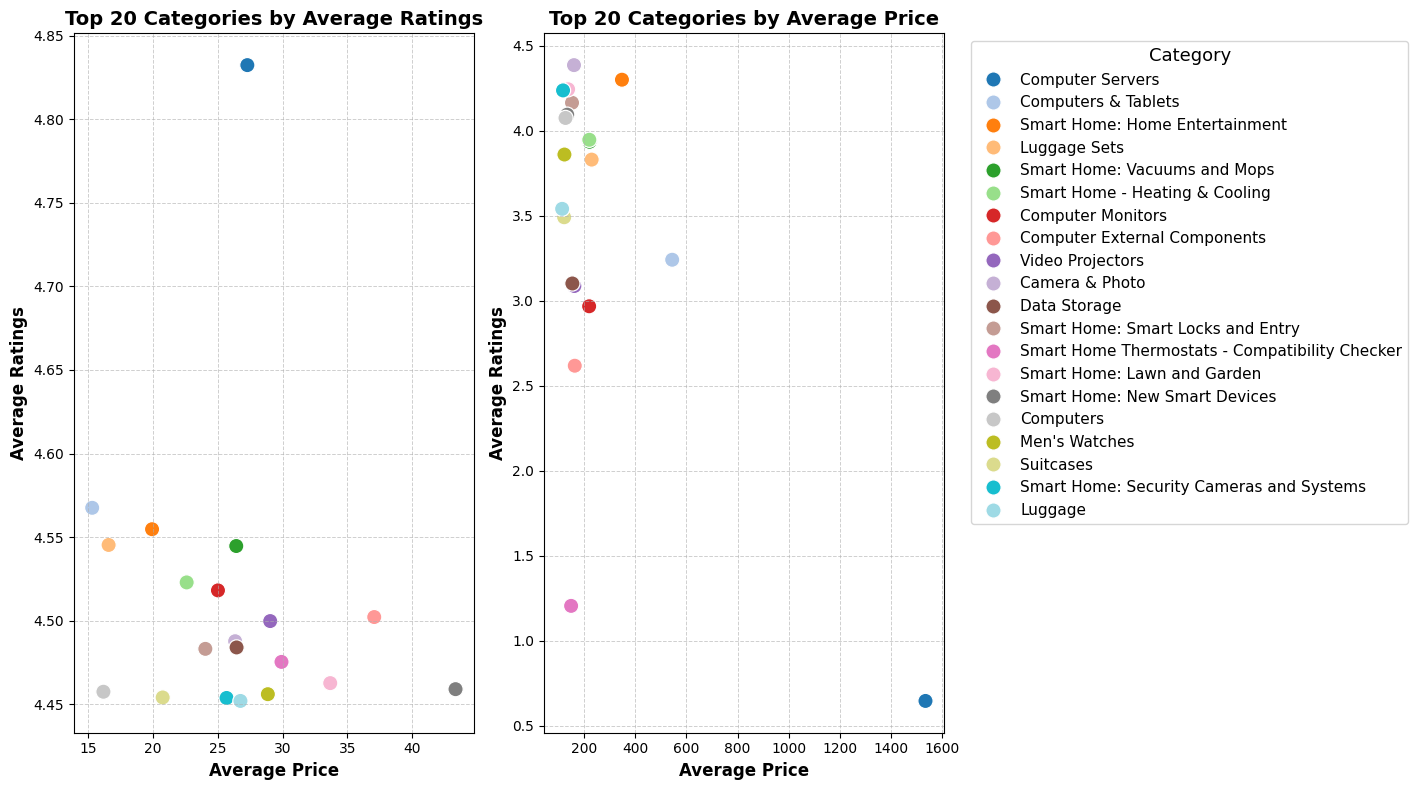

In [79]:
# 2. **Product Performance by Category:**
#    - **Question**: How do product attributes like `price` and `stars` affect performance across different categories? Perform a comparative analysis.
#    - **Time Limit**: 3-4 hours.

# Group by Category_Name and calculate the mean price and stars
category_performance = df.groupby("Category_Name").agg({
                                                        "category_id":"count",  
                                                        "price":"mean",
                                                        "stars":"mean"
                                                        }).reset_index()

# Sorting top 20 category based on average ratings performance
category_performance_by_stars = category_performance.sort_values(by="stars", ascending=False).head(20)

# Sorting top 20 category based on average price performance
category_performance_by_price = category_performance.sort_values(by="price", ascending=False).head(20)



fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(18,8))


# Plotting first scatterplot based on average top 20 ratings
sns.scatterplot(data = category_performance_by_stars, x = category_performance_by_stars["price"], y= category_performance_by_stars["stars"], 
                hue= "Category_Name", palette='tab20', s=120, edgecolor= "w", ax= fig1, legend= False)
fig1.set_title("Top 20 Categories by Average Ratings", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_xlabel("Average Price", fontsize= 12, fontweight= "bold", color= "black")
fig1.set_ylabel("Average Ratings", fontsize= 12, fontweight= "bold", color= "black")
fig1.grid(True, ls="--", lw = 0.7, alpha= 0.6)


# Plotting second scatterplot based on average top 20 price
sns.scatterplot(data = category_performance_by_price, x = category_performance_by_price["price"], y= category_performance_by_price["stars"], 
                hue= "Category_Name", palette='tab20', s=120, edgecolor= "w", ax= fig2, legend="full")
fig2.set_title("Top 20 Categories by Average Price", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_xlabel("Average Price", fontsize= 12, fontweight= "bold", color= "black")
fig2.set_ylabel("Average Ratings", fontsize= 12, fontweight= "bold", color= "black")
fig2.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='13', fontsize='11')
fig2.grid(True, ls="--", lw= 0.7, alpha= 0.6)

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


In [114]:
# 3. **Price Elasticity Model:**
#    - **Question**: Build a model to estimate price elasticity based on the relationship between `price`, `listPrice`, and `boughtInLastMonth`.
#    - **Time Limit**: 4 hours.

#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

# Analyzing relationship between them to build model
# sns.heatmap(df[["price", "stars", "boughtInLastMonth"]].corr(), annot=True, cmap="coolwarm", vmax=1, vmin=-1, center=0, square=True, linewidths= 0.5, cbar_kws={"shrink": .5})
# plt.show()



# Assigning data to in x and y for further splitting purpose
x = df[["stars", "boughtInLastMonth"]]
y = df[["price"]]

# Splitting data in x and y for further training and testing purpose
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=31)

# Creating and Fitting data to model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting price 
predict = model.predict(x_test)

# Finding intercept, slope, mse, rmse
slope = model.coef_[0]
intercept = model.intercept_
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)


print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"The equation of line is: Y = {intercept} + {slope} x X")
print(f"Mean squared error: {mse}")
print(f"Root mean squared error: {rmse}")

#Printing predictions and its accuracy 
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)
print("Accuracy (in percentage %): ", model.score(x_test, y_test) * 100)
print("Price Predictions test: ", predict)

Slope: [-7.47061486e+00 -3.35139263e-03]
Intercept: [73.74317391]
The equation of line is: Y = [73.74317391] + [-7.47061486e+00 -3.35139263e-03] x X
Mean squared error: 16970.998990573786
Root mean squared error: 130.27278683813356
Intercept:  [73.74317391]
Coefficients:  [[-7.47061486e+00 -3.35139263e-03]]
Accuracy (in percentage %):  0.7215014832915867
Price Predictions test:  [[39.11998924]
 [39.37834554]
 [39.79026776]
 ...
 [43.86071446]
 [38.63128405]
 [43.52557519]]


In [21]:
# 4. **Price vs. Sales Performance:**
#    - **Question**: Investigate how variations in `price` influence sales performance (`boughtInLastMonth`). Perform a segmented analysis based on price ranges and visualize the findings.

# Define price and quantity bins
price_bins = [0, 1000, 5000, 10000, 20000]
price_labels = ['Very Low', 'Low', 'Medium', 'High']

qtysold_bins = [0, 10000, 50000, 100000]
qtysold_labels = ['Low Sales', 'Medium Sales', 'High Sales']

# Segment the data
df['Price_Segment'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)
df['QtySold_Segment'] = pd.cut(df['boughtInLastMonth'], bins=qtysold_bins, labels=qtysold_labels, right=False)

# Print segmented data
print(df)

               asin  stars  reviews   price  listPrice  category_id  \
0        B014TMV5YE    4.5        0  139.99       0.00          104   
1        B07GDLCQXV    4.5        0  169.99     209.99          104   
2        B07XSCCZYG    4.6        0  365.49     429.99          104   
3        B08MVFKGJM    4.6        0  291.59     354.37          104   
4        B01DJLKZBA    4.5        0  174.99     309.99          104   
...             ...    ...      ...     ...        ...          ...   
1426332  B00R3LIKCO    4.2        0   14.95       0.00          112   
1426333  B098BQ7ZQ3    4.4        0   33.99       0.00          112   
1426334  B07X1MVNT1    3.6        0    8.54       0.00          112   
1426335  B08XLBG8V9    4.5        0   54.36      57.39          112   
1426336  B07GH67QC8    4.9        0   18.79       0.00          112   

         isBestSeller  boughtInLastMonth      Category_Name  Total_Sales  \
0               False               2000          Suitcases     279980.

In [9]:
# 5. **Comparison of Best Sellers:**
#    - **Question**: Identify the top 5 selling products and compare their attributes (e.g., `price`, `stars`, `category_id`). Create a summary report highlighting any common characteristics among the best sellers.

top_products_comparison = df.groupby("Category_Name").agg({"price":"mean", "listPrice":"mean", "stars":"mean", "reviews":"mean", "boughtInLastMonth":"sum", "Profit":"sum", "Total_Sales":"sum"}).sort_values(by="boughtInLastMonth",ascending=False).head()
print(top_products_comparison)

                                 price  listPrice     stars     reviews  \
Category_Name                                                             
Kitchen & Dining             26.417577  15.619072  4.544674    0.000000   
Hair Care Products           20.931389   9.305542  4.409620    0.000000   
Industrial & Scientific      19.917598  11.162806  4.554726    0.000000   
Household Cleaning Supplies  19.480034   7.392920  4.347976    0.000000   
Skin Care Products           20.736743   9.327951  4.454075  131.951078   

                             boughtInLastMonth       Profit  Total_Sales  
Category_Name                                                             
Kitchen & Dining                      10432300  116145563.0  267189588.0  
Hair Care Products                     8012850   73567543.5  152940697.5  
Industrial & Scientific                7093350   47528459.5  130196201.5  
Household Cleaning Supplies            6875700   56809395.0  120567961.5  
Skin Care Products      